# Tamizhiniyan S R

# TASK-3: Prediction using Decision Tree Algorithm

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")


In [3]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']


In [11]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.89029859,  1.25252977, -1.34194621, -1.26944709],
       [-1.29467634, -0.11715866, -1.34194621, -1.26944709],
       [-1.50264204,  0.61411567, -1.56150379, -1.26944709],
       [-1.57196394,  0.32392744, -1.041499  , -1.26944709],
       [-1.10981794,  1.36860506, -1.34194621, -1.26944709],
       [-0.60145734,  1.6239707 , -0.6717178 , -0.70376041],
       [-1.57196394,  1.04359425, -1.34194621, -0.86538517],
       [-1.10981794,  1.04359425, -1.041499  , -1.26944709],
       [-1.67594678, -0.53502971, -1.34194621, -1.26944709],
       [-1.29467634,  0.32392744, -1.041499  , -1.7196875 ],
       [-0.60145734,  1.41503518, -1.041499  , -1.26944709],
       [-1.42176649,  1.04359425, -0.79883009, -1.26944709],
       [-1.42176649, -0.11715866, -1.34194621, -1.7196875 ],
       [-1.72216138, -0.11715866, -1.70017174, -1.7196875 ],
       [ 0.03399341,  1.65879329, -1.66550475, -1.26944709],
       [-0.13931134,  1.72843846, -1.041499  , -0.70376041],
       [-0.60145734,  1.

In [12]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [14]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9555555555555556


In [15]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_2 <= -0.59
|   |--- class: 0
|--- feature_2 >  -0.59
|   |--- feature_3 <= 0.62
|   |   |--- feature_2 <= 0.67
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.67
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.62
|   |   |--- feature_2 <= 0.56
|   |   |   |--- feature_1 <= 0.25
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.25
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.56
|   |   |   |--- class: 2



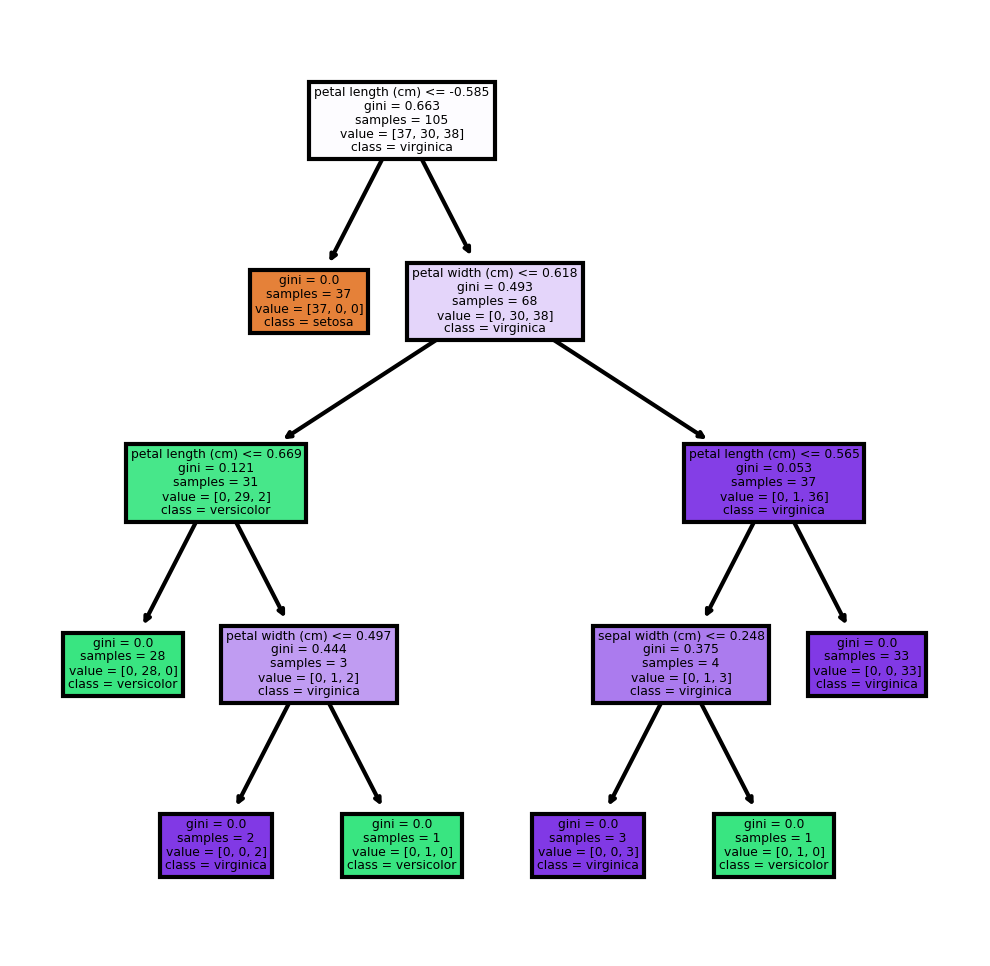

In [20]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('DECISION_TREE.png')


In [17]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))


Random Forest -  0.9777777777777777


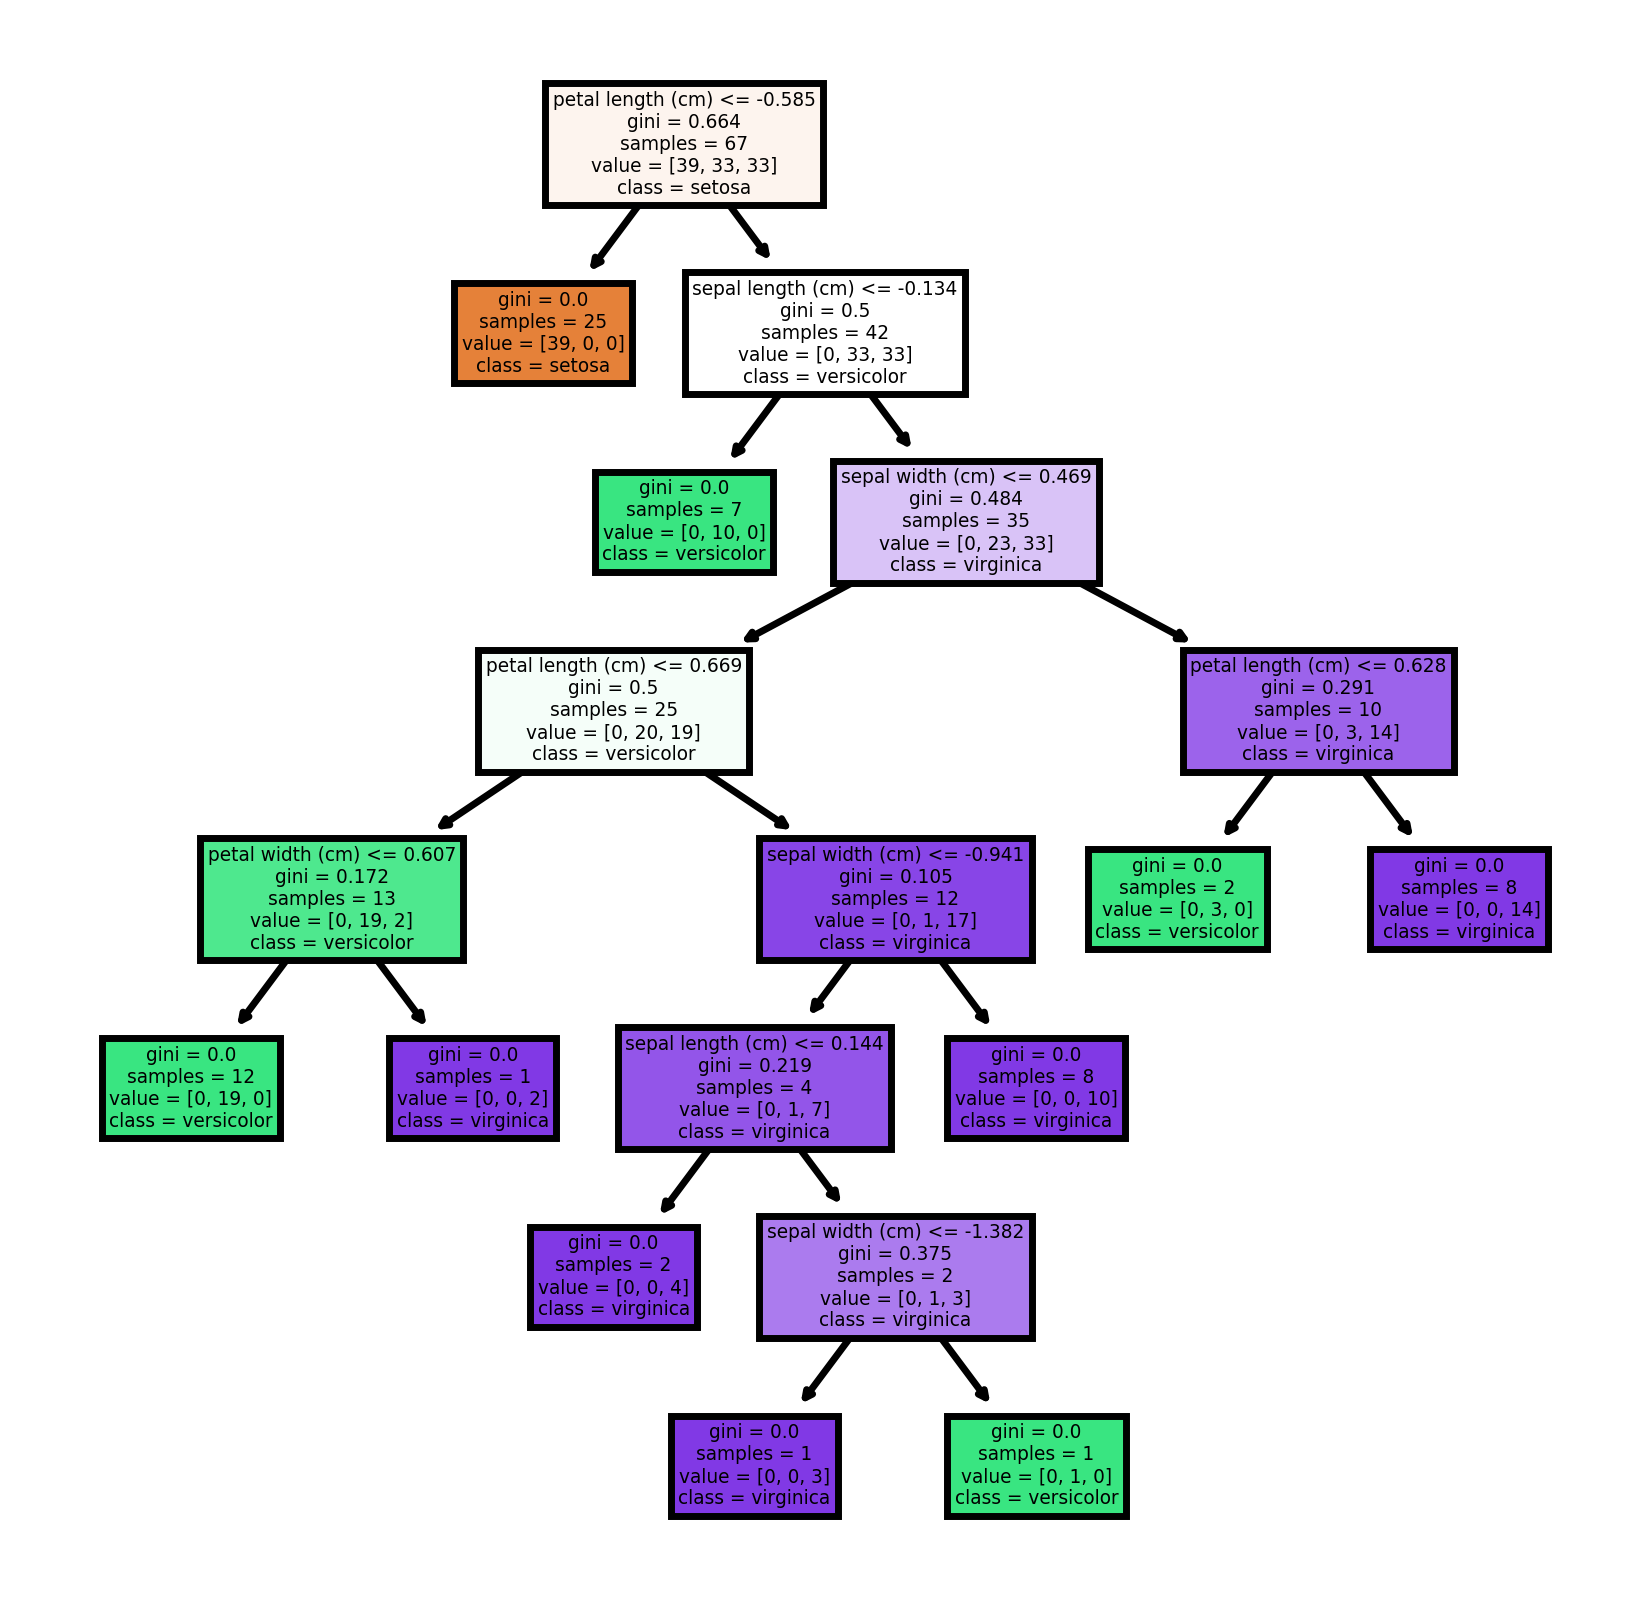

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(rfc_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('RANDOM_FOREST.png')